<a href="https://colab.research.google.com/github/chonayoung/2020-2-AI/blob/main/code/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 회귀 문제: 뉴스 기사 분류

로이터(reuter)뉴스를 46개의 상호 배타적인 토픽을 분류
* 로이터 뉴스 : 1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합체
로이터 뉴스 기사 데이터는 총 11,258개의 뉴스 기사가 46개의 뉴스 카테고리로 분류되는 뉴스 기사 데이터


In [ ]:
#1. 텐서 플로우,케라스, 필요라이브러리 임포트
import tensorflow as tf 
from tensorflow import keras 

from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import reuters

In [ ]:
#2. 데이터 탐색 : 리소스를 불러옴, 데이터에서 가장 자주 등장하는 단어 1만 개 로 제한
# num_words : 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지만 사용할 것인지 조절
# test_split : 전체 뉴스 기사 데이터 중 테스트용 뉴스 기사로 몇 퍼센트를 사용할 것인지를 의미
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
#2.1 데이터 선처리
#레이블을 벡터로 바꾸는 방법은 두 가지
# 1. 레이블의 리스트를 정수 텐서로 변환하는 것
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [ ]:
# 2. 원–핫 인코딩을 사용하는 것
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [ ]:
# 원-핫 인코딩 쉽게 케라스 이용
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
#3 모델 구성 (CNN 모델 구성)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


10000차원 텐서를 주입하기 때문에 input_shape를 (10000,)으로 설정

만약 데이터셋의 형태가 (samples, d1, d2, ...) 이라면 samples를 제외한 (d1, d2, ...)를 input_shape로 설정

 활성화(activation) 함수는 relu를 사용, 46개의 토픽으로 다중 분류하는 것이므로 softmax를 마지막 활성화 함수로 설정, output은 46으로 설정.
 
그러면 softmax의 46개 output 중 가장 큰 값이 예측 값이 되게 된다

모델 구성 할 때 중요한 점
: 최종 출력이 46으로 크기 때문에 앞의 layer의 출력 크기는 그보다 충분히 커야함!

이유 : 출력을 작게 하면, 데이터의 특징이 손실되어 제대로된 정보결과를 얻지 못할 수 있기 때문에 (정보병목)


In [ ]:
#3.1 컴파일
# 손실함수 : categorical_crossentropy (두 확률 분포 사이의 거리를 측정)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#4. 모델 훈련
# 훈련 데이터에서 1,000개의 샘플을 따로 떼어서 검증 세트로 사용
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 42ms/step - loss: 0.2461 - accuracy: 0.9442 - val_loss: 0.9142 - val_accuracy: 0.8100
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 0.2123 - accuracy: 0.9479 - val_loss: 0.9350 - val_accuracy: 0.8140
Epoch 3/20
16/16 [==============================] - 1s 38ms/step - loss: 0.1867 - accuracy: 0.9515 - val_loss: 0.9523 - val_accuracy: 0.8110
Epoch 4/20
16/16 [==============================] - 1s 37ms/step - loss: 0.1683 - accuracy: 0.9526 - val_loss: 0.9597 - val_accuracy: 0.8090
Epoch 5/20
16/16 [==============================] - 1s 38ms/step - loss: 0.1523 - accuracy: 0.9554 - val_loss: 0.9724 - val_accuracy: 0.8170
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.1425 - accuracy: 0.9548 - val_loss: 0.9884 - val_accuracy: 0.8210
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.1369 - accuracy: 0.9557 - val_loss: 1.0978 - val_accuracy: 0.7870
Epoch 8/20
16

[1.38988196849823, 0.777827262878418]

훈련데이터에 대한 정확도는 약 96.1%

검증 데이터에 대한 정확도는 약 78.9%

테스트 데이터에 대한 정확도는 77.6%

훈련 데이터에 대한 정확도는 높은데 다른 데이터에 대해서는 정확도가 높지 못 하다. 그 이유는 바로 학습 모델이 훈련 데이터에 overfitting(과적합) 되었기 때문

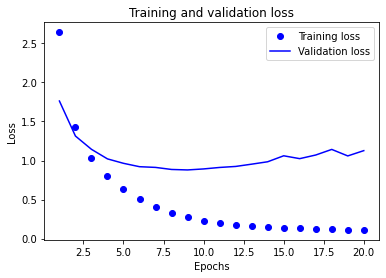

In [ ]:
#4.1 손실확인
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

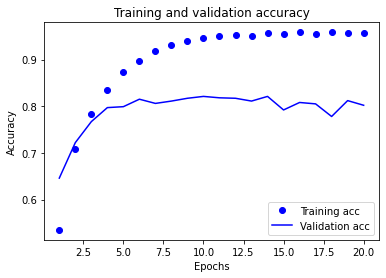

In [ ]:
#4.2 정확도 확인
plt.clf() #그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

이 모델은 아홉 번째 에포크 이후에 과대적합이 시작됨을 알 수 있다.
-> 아홉 번의 에포크로 새로운 모델을 훈련

In [ ]:
# 과대적합으로 새로운 모델 적용
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 47ms/step - loss: 2.6941 - accuracy: 0.5109 - val_loss: 1.8194 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 1s 36ms/step - loss: 1.4618 - accuracy: 0.7040 - val_loss: 1.3011 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 1s 37ms/step - loss: 1.0604 - accuracy: 0.7779 - val_loss: 1.1257 - val_accuracy: 0.7630
Epoch 4/9
16/16 [==============================] - 1s 37ms/step - loss: 0.8353 - accuracy: 0.8235 - val_loss: 1.0221 - val_accuracy: 0.7890
Epoch 5/9
16/16 [==============================] - 1s 36ms/step - loss: 0.6672 - accuracy: 0.8622 - val_loss: 0.9625 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 1s 36ms/step - loss: 0.5340 - accuracy: 0.8924 - val_loss: 0.9385 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 1s 36ms/step - loss: 0.4311 - accuracy: 0.9124 - val_loss: 0.8998 - val_accuracy: 0.8210
Epoch 8/9
16/16 [===

In [ ]:
# 5 결과
results

[0.9787474870681763, 0.7902938723564148]

대략 78%의 정확도를 달성하였음.

In [ ]:
# 6 예측
predictions = model.predict(x_test)